<a href="https://colab.research.google.com/github/liupengzhouyi/LearnPython3/blob/master/limingxiu/%E5%AE%9E%E9%AA%8C%E4%B8%89_%E8%AE%A1%E7%AE%97_k_%E4%BD%8D%E6%95%B0%E7%9A%84%E9%9A%8F%E6%9C%BA%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 实验三:计算 k 位数的随机算法

## 1. 实验目的
1、掌握分治算法和随机算法的设计思想与方法

2、熟练使用高级编程语言实现分治算法和随机算法

3、通过对比不同参数，理解算法具体原理，理解分治算法和随机算法

## 2. 实验学时
4 学时。

## 3. 实验问题

输入:乱序实数数组𝐴 = {𝑥1, 𝑥2, . . . , 𝑥𝑛}

输出:𝐴的第 k 小元素(详情请见课件分治算法、随机算法)

## 4. 实验步骤

### 4.1 实现基于分治方法的 k 位数算法
> 提示:参考第三章 3.5 节。
* BFPRT算法


#### 流程

#### 数据生成

In [ ]:
import random
num = 100
array = [random.randint(1, 1000000) for i in range(num)]
random.shuffle(array) #打散数据
random.shuffle(array) #再次打散数据

#### 核心代码

In [ ]:
#寻找第K小的数
def select_fctI(array,k):
    if len(array)<=10:#边界条件
        array=sorted(array)
        return array[k]
    pivot=get_pivotI(array)  #得到支点数
    array_lt,array_gt,array_eq=patition_arrayI(array,pivot)#按照支点数划分
    if k<len(array_lt):#所求数在支点数的左边
        return select_fctI(array_lt,k)#递归执行，排序为k
    elif k<len(array_lt)+len(array_eq):#所求数为支点数
        return array_eq[0]
    else:#所求数在支点数的右边
        normalized_k=k-(len(array_lt)+len(array_eq))#此时排序发生变化，不是k，而需要经过变化
        return select_fctI(array_gt,normalized_k)

#得到支点数
def get_pivotI(array):
    subset_size = 5#每一组有5个元素
    subsets = []#用于记录各组元素
    num_medians = len(array) / subset_size
    if (len(array) % subset_size) > 0:
        num_medians += 1 #不能被5整除
    for i in range(int(num_medians)):#划分为若干个组，每组5个元素
        beg = i * subset_size
        end = min(len(array), beg + subset_size)
        subset = array[beg:end]
        subsets.append(subset)#subsets列表格式如下[[len=5]，[],[]......]
    medians = []
    for subset in subsets:
        median = select_fctI(subset, len(subset) // 2)
        medians.append(median)#格式为[a,b,c]，构成中间数列表
    pivot = select_fctI(medians, len(subset) // 2)#再从中间数列表中找出中间数
    return pivot

# 按照支点数划分数组
def patition_arrayI(array, pivot):
    array_lt = []
    array_gt = []
    array_eq = []
    for item in array:
        if item < pivot:
            array_lt.append(item)#小于中间数的放左边
        elif item > pivot:
            array_gt.append(item)#大于中间数的放右边
        else:
            array_eq.append(item)#等于中间数的储存一个列表
    return array_lt, array_gt, array_eq


#### 效果

In [ ]:
import time;
def getMS():
    t = time.time()
    a = str(int(round(t * 1000000)))    #微秒级时间戳
    return a

k = 7
a = getMS()
kval = select_fctI(array, k)#调用函数
b = getMS()
print(kval)

sorted_array = sorted(array)
if sorted_array[k] == kval: #进行验证
    print('OK')

print(b,'-',a, '=', int(b)-int(a))

102223
OK
1606821964683768 - 1606821964683602 = 166


### 4.2 实现基于随机方法的 k 位数算法
> 提示:参考第七章 7.3 节。

#### 流程

1. 在数据中随机一位做标点x　
2. 分成三组数据
    * 小于 x
    * 等于 x
    * 大于 x
3. 判断所求在那一组数据中
4. 递归，直至出结果


#### 数据生成

In [ ]:
import random
num = 200
array = [random.randint(1, 1000000) for i in range(num)]
print(len(array))
random.shuffle(array)#打散数据
random.shuffle(array)#再次打散数据

200


#### 核心代码

In [ ]:
#寻找第K小的数
def select_fctII(array,k):
    if len(array)<=10:#边界条件
        array=sorted(array)
        return array[k]
    pivot = array[random.randint(0, len(array))-1] #得到支点数
    array_lt,array_gt,array_eq=patition_arrayII(array,pivot)#按照支点数划分
    if k<len(array_lt): #所求数在支点数的左边
        return select_fctII(array_lt, k) #递归执行，排序为k

    elif k<len(array_lt)+len(array_eq): #所求数为支点数
        return array_eq[0]

    else:#所求数在支点数的右边
        normalized_k=k-(len(array_lt)+len(array_eq))#此时排序发生变化，不是k，而需要经过变化
        return select_fctII(array_gt,normalized_k)

# 按照支点数划分数组
def patition_arrayII(array, pivot):
    array_lt = []
    array_gt = []
    array_eq = []
    for item in array:
        if item < pivot:
            array_lt.append(item)#小于中间数的放左边
        elif item > pivot:
            array_gt.append(item)#大于中间数的放右边
        else:
            array_eq.append(item)#等于中间数的储存一个列表
    return array_lt, array_gt, array_eq

#### 效果

In [ ]:
import time;
def getMS():
    t = time.time()
    a = str(int(round(t * 1000000)))    #微秒级时间戳
    return a

k = 7
a = getMS()
kval = select_fctII(array, k)#调用函数
b = getMS()
print(kval)

sorted_array = sorted(array)
if sorted_array[k] == kval: #进行验证
    print('OK')

print(b,'-',a, '=', int(b)-int(a))

49844
OK
1606821976387899 - 1606821976387670 = 229


### 4.3 对比两种 k 位数算法

(1)随机生成大小不同数据集合，如大小分别为(1000，2000，5000，10000， 20000, 50000, 100000)的数据集合;

(2)对每个算法，针对不同大小的数据集合，运行算法 1000 次并记录算法运行 的平均时间;

(3)将得到的运行时间绘制成曲线，分析并比较两种不同的算法。


1000 : 
sumTime: 5222 , avgTime: 0.5222
sumTime: 2082 , avgTime: 0.2082
2000 : 
sumTime: 10384 , avgTime: 1.0384
sumTime: 4429 , avgTime: 0.44289999999999996
5000 : 
sumTime: 26673 , avgTime: 2.6673
sumTime: 10632 , avgTime: 1.0632000000000001
10000 : 
sumTime: 48716 , avgTime: 4.8716
sumTime: 16407 , avgTime: 1.6407
20000 : 
sumTime: 103956 , avgTime: 10.3956
sumTime: 47916 , avgTime: 4.791600000000001
50000 : 
sumTime: 380658 , avgTime: 38.0658
sumTime: 125466 , avgTime: 12.5466
100000 : 
sumTime: 753855 , avgTime: 75.3855
sumTime: 265009 , avgTime: 26.5009


/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


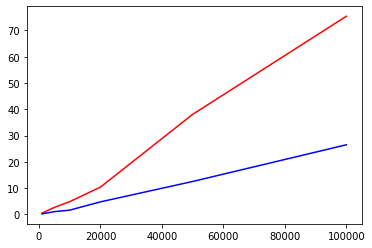

In [ ]:
boundarys = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
avgTimesI = []
avgTimesII = []
times = 10
k = 7
for boundary in boundarys:
    print(boundary,': ')
    sumTimeI = 0
    sumTimeII = 0
    for i in range(times):
        num = boundary
        array = [random.randint(1, 1000000) for i in range(num)]
        random.shuffle(array)#打散数据
        random.shuffle(array)#再次打散数据
        
        # 分治
        aI = getMS()
        kval = select_fctI(array, k)#调用函数
        bI = getMS()
        sumTimeI = sumTimeI + int(bI)-int(aI)
        avgTimeI = sumTimeI/times/1000

        # 随机
        aII = getMS()
        kval = select_fctII(array, k)#调用函数
        bII = getMS()
        sumTimeII = sumTimeII + int(bII)-int(aII)
        avgTimeII = sumTimeII/times/1000


    print('sumTime:', sumTimeI, ', avgTime:', avgTimeI)
    print('sumTime:', sumTimeII, ', avgTime:', avgTimeII)
    avgTimesI.append(avgTimeI)
    avgTimesII.append(avgTimeII)


import numpy as np
import matplotlib.pyplot as plt
 
x=[0,1]
y=[0,1]
plt.figure()
plt.plot(boundarys,avgTimesI, color='R')
plt.plot(boundarys,avgTimesII, color='B')
plt.show()

* 结论：
* 蓝色为随机
* 红色为分治
* 数据量越大，随机比分治的效率越高

### 4.4 随机算法参数分析

(1)改变随机 k 位数算法的采样比例(原始是 3/4)，分别为(1/8，1/4，3/8，...， 7/8，1);
> 注:|𝑃| ≤ 4𝑛3/4 + 1此处的 3/4 亦需要修改。

(2)点数规模是 50000，运行算法 1000 次，记录第一次运行算法可以得到 k 位数的次数和运行一次算法的平均时间; 

(3)将一次运行得到正确结果的概率和运行时间绘制成曲线，分析并比较。


In [ ]:
import random
allTime = 0
array = [random.randint(1, 1000000) for i in range(500)]
random.shuffle(array)#打散数据
random.shuffle(array)#再次打散数据
sumTimeII = 0

def select_fctIII(array,k):
    if len(array)<=10:#边界条件
        array=sorted(array)
        return array[k]
    pivot = array[random.randint(0, len(array))-1] #得到支点数
    array_lt,array_gt,array_eq=patition_arrayII(array,pivot)#按照支点数划分
    if k<len(array_lt): #所求数在支点数的左边
        return select_fctIII(array_lt, k) #递归执行，排序为k

    elif k<len(array_lt)+len(array_eq): #所求数为支点数
        if len(array) == 50000:
            allTime = allTime + 1
        return array_eq[0]

    else:#所求数在支点数的右边
        normalized_k=k-(len(array_lt)+len(array_eq))#此时排序发生变化，不是k，而需要经过变化
        return select_fctIII(array_gt,normalized_k)

for i in range(100000):
    
    aII = getMS()
    kval = select_fctIII(array, k)#调用函数
    bII = getMS()
    sumTimeII = sumTimeII + int(bII)-int(aII)
    avgTimeII = sumTimeII/times/1000

print('sumTime:', sumTimeII, ', avgTime:', avgTimeII)
avgTimesII.append(avgTimeII)
print(allTime)
print('一次运行得到正确结果的概率:', allTime/1000, '%')
print('运行一次算法的平均时间:', avgTimeII)


sumTime: 11579343 , avgTime: 1157.9343000000001
0
一次运行得到正确结果的概率: 0.0 %
运行一次算法的平均时间: 1157.9343000000001
